
## Modelo logístico

Como se puede observar del ejemplo anterior, el modelo exponencial con $\kappa>1$ describe una población que crece ilimitadamente. Para tener un modelo un poco más realista del comportamiento de una población, se debe incluir un elemento que describa un factor que limite el crecimiento.

Según el [modelo logístico](https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth), la tasa de crecimiento $\kappa$ se modifica para tener en cuenta un factor relacionado con la "capacidad de carga del medio", es decir, con la máxima población que se puede sostener con los recursos que tienen disponibles. En términos de una ecuación de diferencia, este modelo se expresa como

$$ P_{n+1} = \left(\kappa  - \beta\, P_n \right) P_{n}, $$

donde el término $-\beta\,P_n$ representa una disminución en la tasa de crecimiento a medida que la población aumenta, es decir, si la población es excesiva, los recursos escasean y se tiene menos descendencia.

## Punto 1

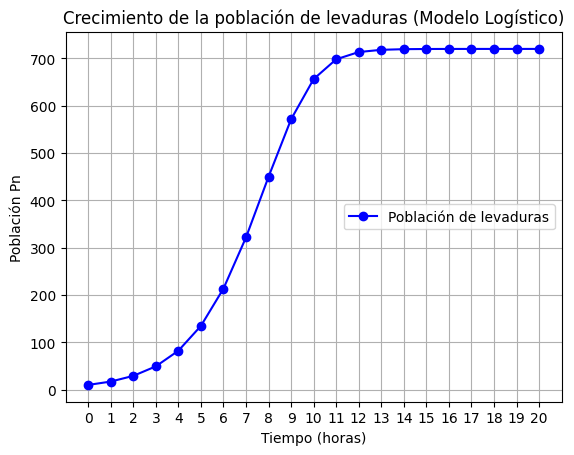

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Parámetros del modelo logístico
kappa = 1.72
beta = 1e-3
P0 = 10  # Población inicial
horas = 20  # Duración en horas

# Inicialización
P = [P0]  # Lista para almacenar la población en cada hora
n = 0

# Calcular la población durante 20 horas
while n < horas:
    Pn = P[n] * (kappa - beta * P[n])
    P.append(Pn)
    n += 1

# Graficar la población en función del tiempo
tiempo = np.arange(horas+1)
# Poner el label "población de levaduras" en  la posición inferior derecha
plt.plot(tiempo, P, marker='o', linestyle='-', color='b', label="Población de levaduras")
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Crecimiento de la población de levaduras (Modelo Logístico)")
plt.grid(True)
plt.legend(loc='center right')
plt.show()



## Punto 2

In [2]:
def g(Pn):
    kappa = 1.72
    beta = 0.001
    return kappa * Pn - beta * Pn**2

# Método del punto fijo

# Valores iniciales
n = 0
Pn = 10            # Aproximación inicial (puedes ajustar este valor)
diferencia = 1     # |Pn+1 - Pn|
tolerancia = 1e-9 # Máxima diferencia permitida
print('-> Tolerancia tol =', tolerancia, '\n')

# Evalúa la recurrencia Pn+1 = g(Pn)
while diferencia > tolerancia:
    print('n =', n, ' P_n = ', Pn, 'g(P_n) =', g(Pn))
    # Siguiente valor de la recurrencia
    Pn_plus_1 = g(Pn)
    # Diferencia entre iteraciones
    diferencia = np.abs(Pn_plus_1 - Pn)
    # Actualiza el valor de Pn
    Pn = Pn_plus_1
    n += 1
    print('diferencia =', diferencia)

# Resultado: Punto fijo
print(f'\nEl punto fijo es P* = {Pn:.2f}')
    

-> Tolerancia tol = 1e-09 

n = 0  P_n =  10 g(P_n) = 17.099999999999998
diferencia = 7.099999999999998
n = 1  P_n =  17.099999999999998 g(P_n) = 29.119589999999995
diferencia = 12.019589999999997
n = 2  P_n =  29.119589999999995 g(P_n) = 49.237744278231894
diferencia = 20.1181542782319
n = 3  P_n =  49.237744278231894 g(P_n) = 82.2645646969503
diferencia = 33.02682041871841
n = 4  P_n =  82.2645646969503 g(P_n) = 134.7275926739758
diferencia = 52.463027977025504
n = 5  P_n =  134.7275926739758 g(P_n) = 213.57993517151365
diferencia = 78.85234249753785
n = 6  P_n =  213.57993517151365 g(P_n) = 321.74109978713545
diferencia = 108.1611646156218
n = 7  P_n =  321.74109978713545 g(P_n) = 449.87735634163755
diferencia = 128.1362565545021
n = 8  P_n =  449.87735634163755 g(P_n) = 571.3994171586759
diferencia = 121.52206081703832
n = 9  P_n =  571.3994171586759 g(P_n) = 656.309703583648
diferencia = 84.91028642497213
n = 10  P_n =  656.309703583648 g(P_n) = 698.1102631458186
diferencia = 41.8

## punto 3


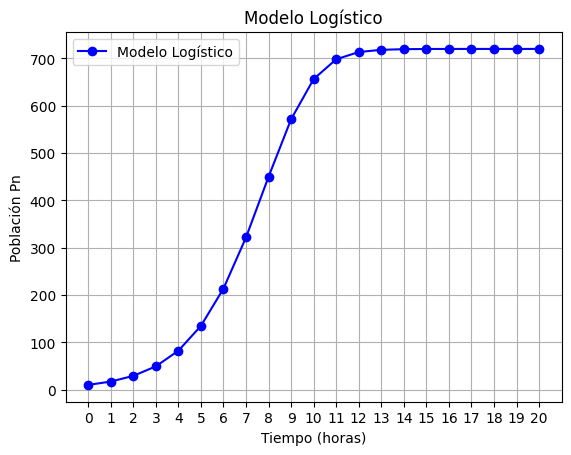

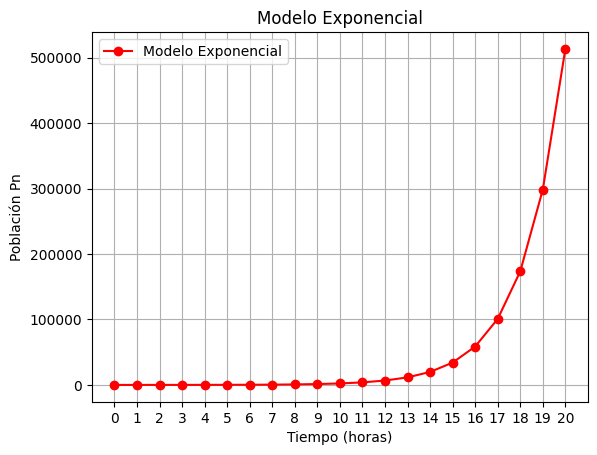

In [3]:
# Parámetros
kappa = 1.72
beta = 1e-3
P0 = 10
horas = 20

# Modelo logístico
P_logistico = [P0]
n = 0
while n < horas:
    Pn = P_logistico[n] * (kappa - beta * P_logistico[n])
    P_logistico.append(Pn)
    n += 1

# Modelo exponencial
P_exponencial = [P0]
for n in range(horas):
    Pn = kappa * P_exponencial[n]
    P_exponencial.append(Pn)

# Graficar la comparación de los dos modelos (Graficas separadas)
plt.figure(1)
plt.plot(range(horas+1), P_logistico, marker='o', linestyle='-', color='b', label="Modelo Logístico")
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Modelo Logístico")
plt.grid(True)
plt.legend()

plt.figure(2)
plt.plot(range(horas+1), P_exponencial, marker='o', linestyle='-', color='r', label="Modelo Exponencial")
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Modelo Exponencial")
plt.grid(True)
plt.legend()


- Los comportamientos son parecidos apenas en las 4-5 primeras horas de simulación, pero luego se empiezan a diferenciar. En el modelo logístico, la población se estabiliza en un valor constante, mientras que en el modelo exponencial la población sigue creciendo indefinidamente.

## Punto 4

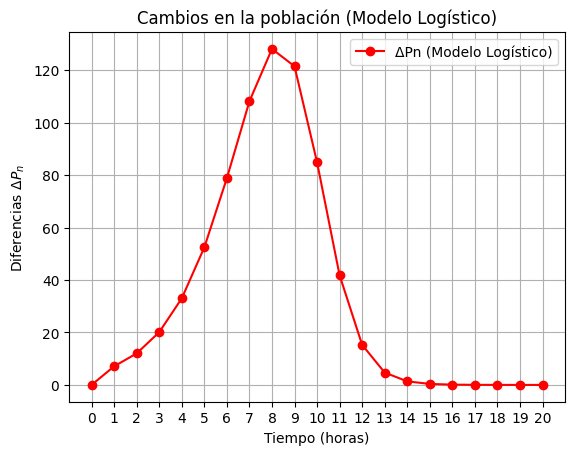

El mayor cambio en la población ocurre en la hora 11, con un incremento de 41.80 individuos.


In [20]:
# Cálculo de las diferencias Delta Pn = Pn * (k - 1) - Beta * Pn^2
Delta_P = [0]
for n in range(horas):
    Delta_Pn = P_logistico[n] * (kappa - 1) - beta * P_logistico[n]**2
    Delta_P.append(Delta_Pn)

# Graficar las diferencias ΔPn
plt.plot(tiempo, Delta_P, label="ΔPn (Modelo Logístico)", marker='o', color='r')
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Diferencias $\Delta P_n$")
plt.title("Cambios en la población (Modelo Logístico)")
plt.grid(True)
plt.legend()
plt.show()

# Cambio entre Delta_P y Delta_Pn
cambio = [0]
for n in range(1, horas+1):
    cambio.append(abs(Delta_P[n] - Delta_P[n-1]))

momento_mayor_cambio = np.argmax(cambio)
indice_mayor_cambio= Delta_P[momento_mayor_cambio]

print(f"El mayor cambio en la población ocurre en la hora {momento_mayor_cambio}, con un incremento de {indice_mayor_cambio:.2f} individuos.")

## Punto 5

In [21]:
with open('crecimiento_levaduras.dat', mode='w') as archivo:
    archivo.write('Hora Delta_Pn\n')
    for hora, cambio, valor in zip(tiempo, Delta_P, P_logistico):
        archivo.write(f'{hora} {cambio} {valor}\n')
        

## Punto 6 

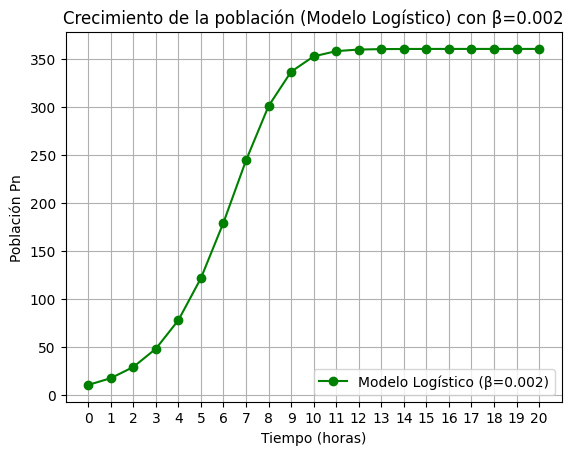

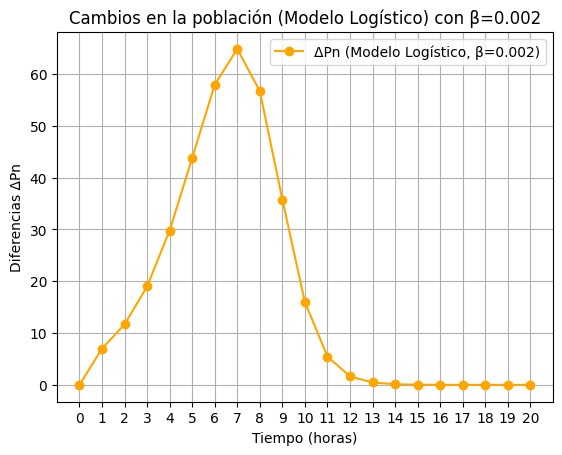

Población máxima con β=0.002: 360.00 individuos


In [22]:

# Ahora recalculamos usando beta = 0.002
beta_new = 0.002
P_logistico_new = [P0]
n = 0
while n < horas:
    Pn = P_logistico_new[n] * (kappa - beta_new * P_logistico_new[n])
    P_logistico_new.append(Pn)
    n += 1

# Cálculo de las diferencias ΔPn con el nuevo beta
Delta_P_new = [0]  

for n in range(horas):
    delta = P_logistico_new[n] * (kappa - 1) - beta_new * P_logistico_new[n]**2
    Delta_P_new.append(delta)
    

# Graficar el comportamiento con el nuevo beta
plt.plot(tiempo, P_logistico_new, label="Modelo Logístico (β=0.002)", marker='o', color='g')
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Crecimiento de la población (Modelo Logístico) con β=0.002")
plt.grid(True)
plt.legend()
plt.show()

# Graficar las diferencias ΔPn con el nuevo beta
plt.plot(tiempo, Delta_P_new, label="ΔPn (Modelo Logístico, β=0.002)", marker='o', color='orange')
plt.xticks(np.arange(0, horas+1, 1))
plt.xlabel("Tiempo (horas)")
plt.ylabel("Diferencias ΔPn")
plt.title("Cambios en la población (Modelo Logístico) con β=0.002")
plt.grid(True)
plt.legend()
plt.show()

print(f"Población máxima con β=0.002: {max(P_logistico_new):.2f} individuos")


- Con este nuevo valor de $\beta$, la población ahora se estabiliza para un valor de 3600 individuos.